In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [0]:
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [0]:
input_img = Input(shape=(28, 28, 1))  
def encode(x):
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  return  MaxPooling2D((2, 2), padding='same')(x)

def decode(z):
  z = Conv2D(8, (3, 3), activation='relu', padding='same')(z)
  z = UpSampling2D((2, 2))(z)
  z = Conv2D(8, (3, 3), activation='relu', padding='same')(z)
  z = UpSampling2D((2, 2))(z)
  z = Conv2D(16, (3, 3), activation='relu')(z)
  z = UpSampling2D((2, 2))(z)
  return Conv2D(1, (3, 3), activation='sigmoid', padding='same')(z)

autoencoder = Model(input_img, decode(encode(inputs)))
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [0]:
batch_history = LossHistory()

In [0]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128,callbacks=[batch_history])

Epoch 1/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1224
Epoch 2/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1200
Epoch 3/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1179
Epoch 4/20
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1158
Epoch 5/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1143
Epoch 6/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1131
Epoch 7/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1119
Epoch 8/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1110
Epoch 9/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1101
Epoch 10/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1093
Epoch 11/20
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1085
Epoch 12/20
60000/60000 [===========================

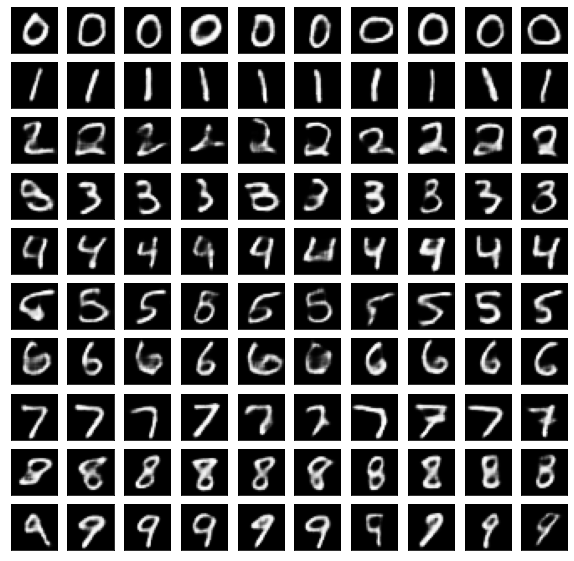

In [139]:
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(10, 10))

for j in range(10):
  n=0
  for i in range(len(y_test)):
    if y_test[i] == j:
      ax = plt.subplot(10, 10, n+1 + j*10)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      n =n+1
    if n > 9:
      break
plt.show()    
